![](https://i.ytimg.com/vi/sxEqtjLC0aM/maxresdefault.jpg)

__Normalization is a technique often applied as part of data preparation for machine learning.
The goal of Normalization is to change the values of the numeric columns in the dataset to use a common scale,without distorting difference in the range of values or losing information__ 

__type of Normalization Scaling__ 
1. MinMaxScaling 
2. Mean Scaling
3. Maxabs Scaling 
4. Rebust Scaling 

__MinMaxScaling formula __
![](https://www.oreilly.com/api/v2/epubs/9781788393485/files/assets/545d977f-9de2-4280-b08a-0436149980c5.png)

After MinMax Scaling the distribution scale between 0 to 1 scalem

In [1]:
import pandas as pd # data Processing
import numpy as np # linear algebra 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('wine_data-Copy1.csv',header=None,usecols=[0,1,2])

In [4]:
df.columns=['Class Lable','Alcohol','Malic acid']

In [5]:
df.sample(5)

,Class Lable,Alcohol,Malic acid
130,3,12.86,1.35
170,3,12.20,3.03
75,2,11.66,1.88
24,1,13.50,1.81
102,2,12.34,2.45


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

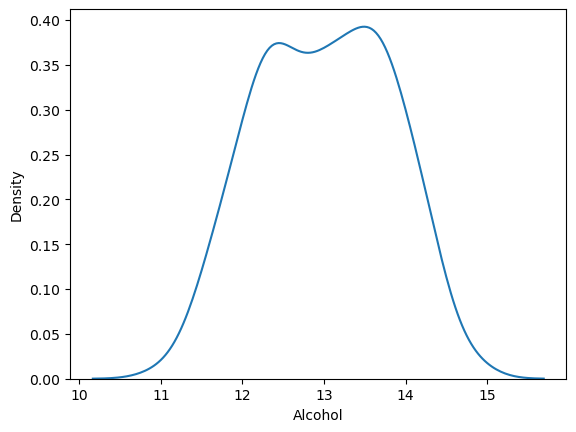

In [6]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Malic acid ', ylabel='Density'>

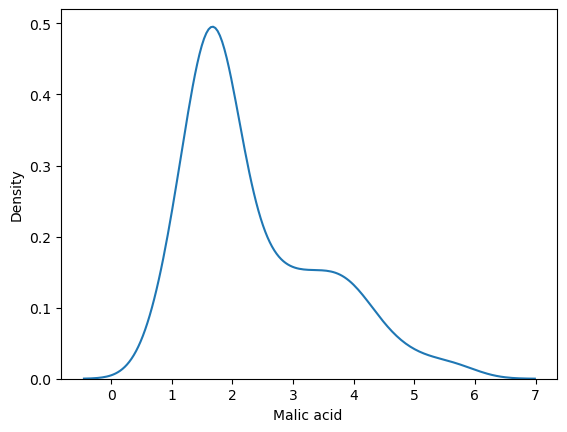

In [7]:
sns.kdeplot(df['Malic acid '])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid '>

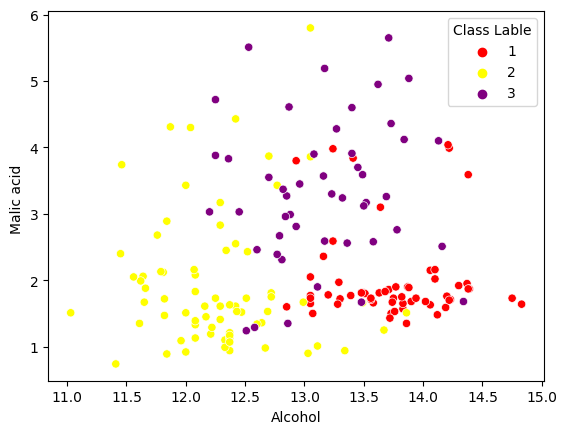

In [14]:
color_dist={1:'Red',2:'yellow',3:'purple'}
sns.scatterplot(df['Alcohol'],df['Malic acid '],hue=df['Class Lable'],palette=color_dist)

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Class Lable',axis=1),
                                              df['Class Lable'],
                                              test_size=0.3,
                                              random_state=0)

In [17]:
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [18]:
from sklearn.preprocessing import MinMaxScaler


In [19]:
scaler=MinMaxScaler()

In [20]:
# fit the scaler to the train set,it will learn the parameter 
scaler.fit(X_train)

MinMaxScaler()

In [21]:
# transform  the train and test set 
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [22]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [23]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [24]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


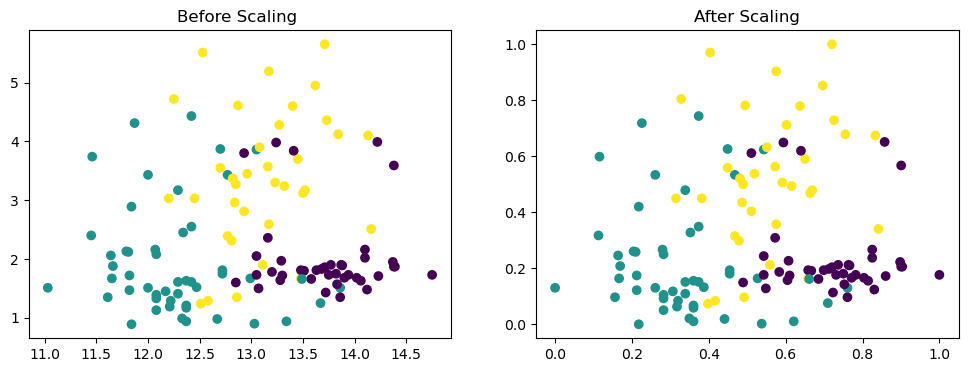

In [26]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,4))

ax1.scatter(X_train['Alcohol'],X_train['Malic acid '],c=y_train)
ax1.set_title("Before Scaling ")
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic acid '],c=y_train)
ax2.set_title("After Scaling")

plt.show()

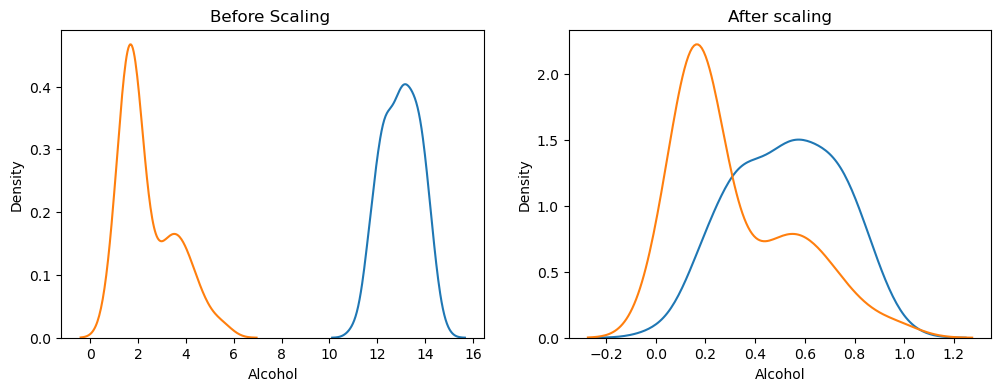

In [27]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,4))

ax1.set_title("Before Scaling ")
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic acid '],ax=ax1)

# after scaling 
ax2.set_title("After scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid '],ax=ax2)

plt.show()

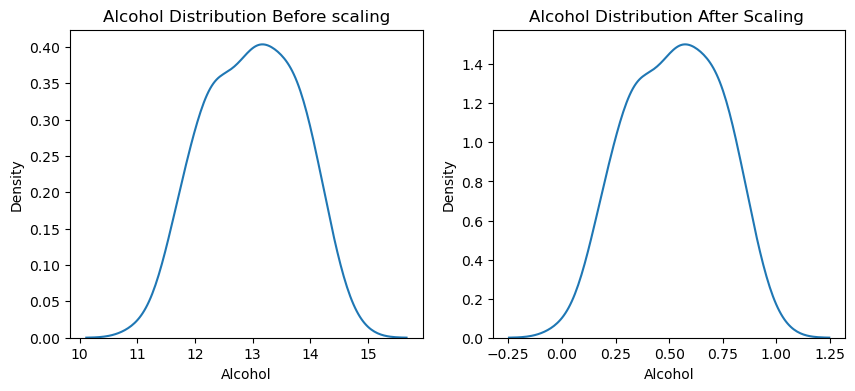

In [28]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,4))

ax1.set_title("Alcohol Distribution Before scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)

ax2.set_title('Alcohol Distribution After Scaling ')
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
plt.show()

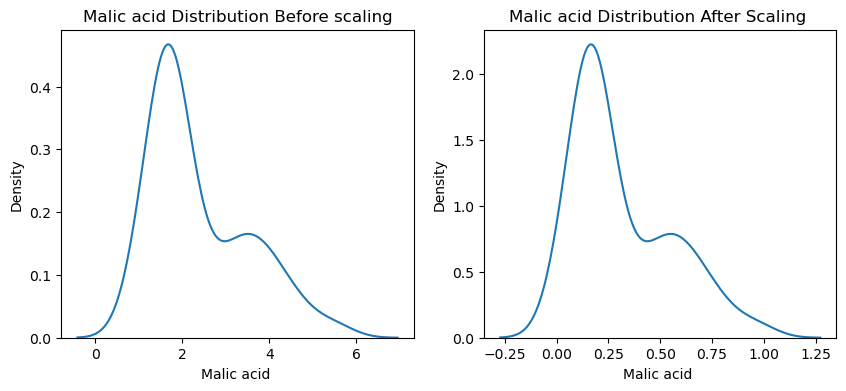

In [30]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,4))

ax1.set_title("Malic acid Distribution Before scaling")
sns.kdeplot(X_train['Malic acid '],ax=ax1)

ax2.set_title('Malic acid Distribution After Scaling ')
sns.kdeplot(X_train_scaled['Malic acid '],ax=ax2)
plt.show()

# Mean Normalization 

![](https://static.packt-cdn.com/products/9781789806311/graphics/assets/2f8cfc79-ae4c-461a-ae07-88a3baf32dbd.png)

Mean Normalization distribution scale between -1 to 1 

# MixAbs Scaling 

![](https://www.oreilly.com/api/v2/epubs/9781789806311/files/assets/d35ab4dd-7642-4e76-8cbf-cdc37a7fb4d8.png)

In [31]:
from sklearn.preprocessing import MaxAbsScaler

In [32]:
Scaler=MaxAbsScaler()

# Robust Scaling 

![](https://i.stack.imgur.com/G3V7C.png)


__if you data got lots of outliers than you can go with Robust Scaling__

In [33]:
from sklearn.preprocessing import RobustScaler

In [34]:
Scaler=RobustScaler()

# Normalization and Standardization 

Is Feature Scaling is required ?
most of the problems are solve throghout the standardization 

![](https://miro.medium.com/v2/resize:fit:1400/1*G3IXvGuD-fnxrQNxTZII_w.png)